# 2 - Introduction to Statistics: Correlation, fitting, regression, and interpolation/extrapolation

<div style = 'background-color:salmon'> <br> <center>  <b> <u> <font size="5">  PLOTTING SCATTERS </font> </u> </b>    </div>
<div style = 'background-color:salmon'> <br> </div>
    
## 1. Correlation

First, let's import the libraries and data we'll need:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';', encoding='latin-1')

### Correlation

Correlation shows how two variables are related. It tells us if they tend to increase or decrease together or 
move in opposite directions.

**Remember:** correlation does not mean causation! Just because two variables are related does not mean one causes the other


Let's look at the variables in our dataset. Are there any two you think might be associated?

In [3]:
print(np.asarray(NBA_regular_2021.columns))

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS']


Consider the "MP" variable (minutes played). Before looking for correlations, it would be useful to understand what we can about the variable. Let's find the range, and have a look at a histogram of the distrubition in this variable

In [4]:
MP_min = np.min(NBA_regular_2021['MP'])
MP_max = np.max(NBA_regular_2021['MP'])
MP_Range = MP_max - MP_min

print("Min MP:      ", MP_min)
print("Max MP:      ", MP_max)
print("Range in MP: ", MP_Range)

Min MP:       1.0
Max MP:       43.5
Range in MP:  42.5


### 🟢 Create a histogram of the dependent variable

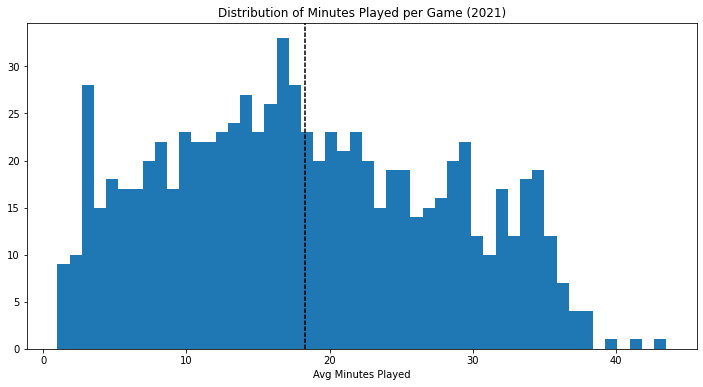

In [5]:
plt.figure(figsize=(12, 6))
plt.xlabel('Avg Minutes Played')
plt.title('Distribution of Minutes Played per Game (2021)')

MP_Average=np.mean(NBA_regular_2021['MP'])

plt.hist(NBA_regular_2021['MP'], bins=50)
plt.axvline(MP_Average, color='black', dashes=[3,1])
plt.show()

The distribution of games played looks close to normal, with a peak close to the average. There is another significant peak near 2-3 minutes played, which means that quite commonly, players only play 2-3 minutes per game (likely from substitutions for a short amount of time or to fulfill a specific role). 

Let's have a look at some potential relations between minutes played and other variables, starting with scatter plots of MP as the independent variable and some other stat as the dependent variable

### 🟢 Create a scatter plot using the dependent and independent variable

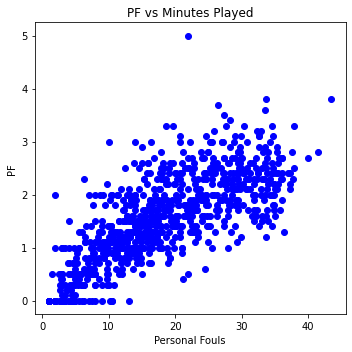

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "PF"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='blue')

axs.set_title('%s vs Minutes Played' %dependent_variable)
axs.set_xlabel("Personal Fouls")
axs.set_ylabel(dependent_variable)

plt.tight_layout()
plt.show()

What do you note about the connection between the dependent variable and minutes played?

What kind of correlation is there? 

If there exists a correlation, is it linear?

<div style = 'background-color:khaki'> <br> <center>  <b> <u> <font size="5">  PEARSON COEFFICIENT </font> </u> </b>    </div>
<div style = 'background-color:khaki'> <br> </div>

### Pearson correlation coefficient

How strongly correlated are the number of 3-Pointers and the 3-Point Attempts? The Pearson correlation coefficient will give us a good idea. This coefficient ranges from -1 to 1 **($-1 < R_P < 1$)**, with -1 meaning the two variables are as anti-correlated as possible (negative correlation), or as correlated as possible (positive correlation). It is calculated using the formula

## $R_P = \dfrac{\sum_i(x_i -\bar{x})(y_i -\bar{y})}{\sqrt{\sum_i(x_i -\bar{x})^2}\sqrt{\sum_i(y_i -\bar{y})^2}}$

We don't have to code this formula up, and can take advantage of numpy's corcoeff function to do this for us

### 🟢 Calculate the Pearson correlation coefficient

In [7]:
# Compute Pearson correlation coefficient matrix
independent_variable = "MP"
dependent_variable = "PF"
correlation_matrix = np.corrcoef(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable])

# Extract the coefficient
R_Pearson = correlation_matrix[0, 1]

print("Pearson correlation coefficient: ", R_Pearson)

Pearson correlation coefficient:  0.7435865386413264


What does this value of the Pearson correlation coefficient tell us? 

<div style = 'background-color:mediumspringgreen'> <br> <center>  <b> <u> <font size="5">  LOOKING FOR CORRELATIONS ON MANY PLOTS </font> </u> </b>    </div>
<div style = 'background-color:mediumspringgreen'> <br> </div>

### 🟢 Looking for correlations in your dataset

Because there are so many variables we could seek relationships for, let's try to automate the exploration of possible relationships between minutes played and other variables. Below we make a nested loop (over indices i and j) to plot all of the scatters for a given independent variable.

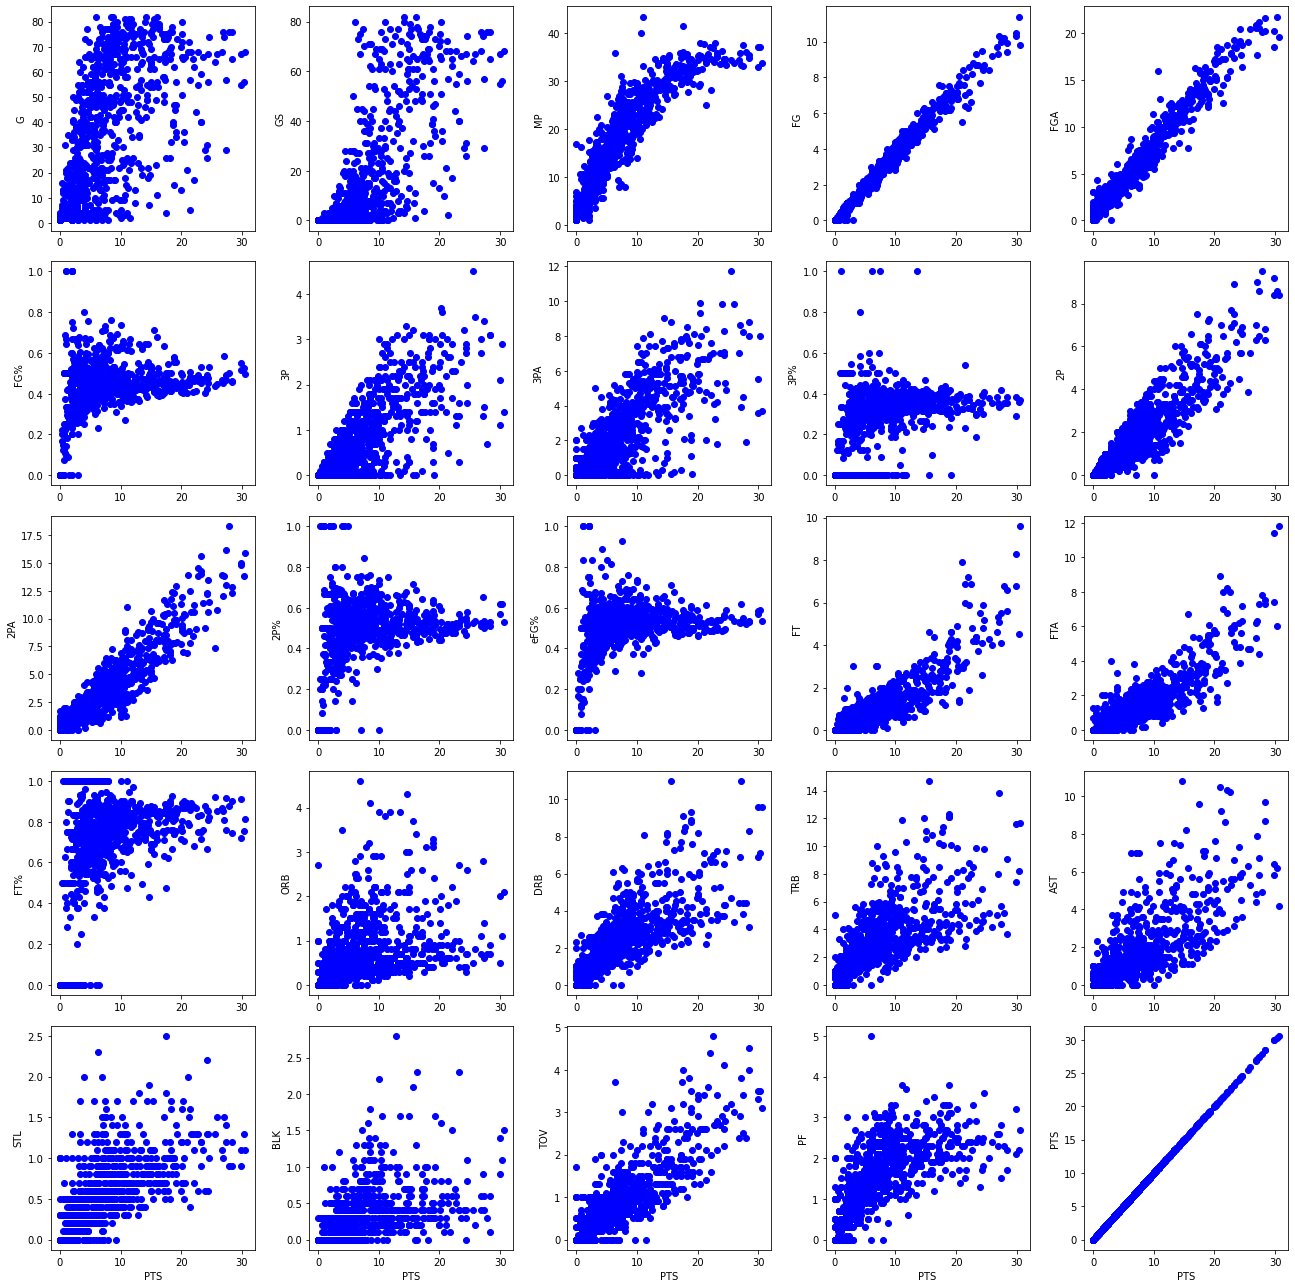

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(5, 5, figsize=(18, 18))

free_index=5
independent_var="PTS"
for i in range(0, 5):
    for j in range(0, 5):
        dependent_variable = "%s"%NBA_regular_2021.columns[free_index]
        axs[i][j].scatter(NBA_regular_2021[independent_var], NBA_regular_2021[dependent_variable], color='blue')
        axs[i][j].set_ylabel(dependent_variable)
        free_index+=1
        if(i==4):
            axs[i][j].set_xlabel(independent_var)

plt.tight_layout()
plt.show()

Which scatters pop out to your eye?

Are all potential correlations linear? If not, what other kinds of relationships are there?

## 2. Linear regression

Let's look at another potential correlation, this time between minutes played (MP) and personal fouls (PF), which appear to have a linear correlation. Let's try to fit this scatter with a linear trend. 

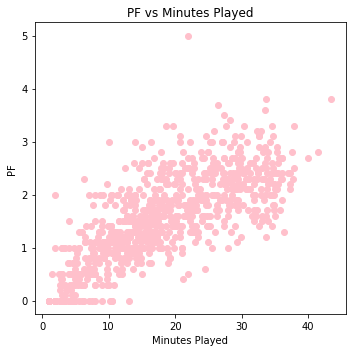

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "PF"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='pink')

axs.set_title('%s vs Minutes Played' %dependent_variable)
axs.set_xlabel("Minutes Played")
axs.set_ylabel(dependent_variable)

plt.tight_layout()
plt.show()

<div style = 'background-color:skyblue'> <br> <center>  <b> <u> <font size="5">  LINEAR FIT </font> </u> </b>    </div>
<div style = 'background-color:skyblue'> <br> </div>

Recall, the equation of a line is

## $ y=mx+b $

and we can find the quantities corresponding to that line using the following equations:

## $ m = \dfrac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2} $
## $ b = \bar{y} - m \bar{x} $

where 

**$\bar{x} = $ average value for independent variable**

**$\bar{y} = $ average value for dependent variable**

**$ m = $ slope**

**$ b = $ y-intercept**

Thankfully we don't have to code these equation up ourselves and can use python libraries to do the linear regression for us. Below we use numpy to find the linear regression of two variables

### 🟢 Plot a linear fit

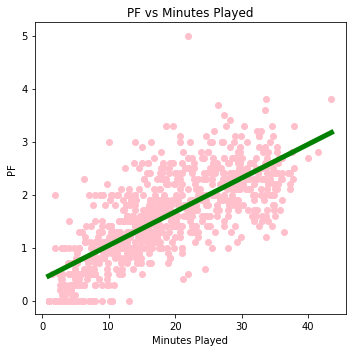

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "PF"

# Fit a polynomial of degree 1 (linear)
#slope, y_intercept = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], 1)
    
# Calculate predicted values y = m* x + b
x_array = np.array(NBA_regular_2021[independent_variable]).reshape(-1, 1)
y_array = np.array(NBA_regular_2021[dependent_variable])
model = LinearRegression()
model.fit(x_array, y_array)
    
# Calculate predicted values
slope = model.coef_[0]
y_intercept = model.intercept_
#y_fit = model.predict(NBA_regular_2021[independent_variable])
x_fit_linear = np.linspace(np.min(x_array), np.max(x_array), 100)
y_fit_linear = slope * x_fit_linear + y_intercept
    
axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='pink')
axs.plot(x_fit_linear, y_fit_linear, color='green', linewidth=5)

axs.set_title('%s vs Minutes Played' %dependent_variable)
axs.set_xlabel("Minutes Played")
axs.set_ylabel(dependent_variable)

plt.tight_layout()
plt.show()

<div style = 'background-color:plum'> <br> <center>  <b> <u> <font size="5">  POLYNOMIAL FIT </font> </u> </b>    </div>
<div style = 'background-color:plum'> <br> </div>

## 3. Polynomial fitting

With polynomial fitting, we assume that the line that best fits the scatter is given by a function that looks like

## $ y = a_1 x + a_2x^2 + a_3x^3 + \cdots$
or, in other words
## $y = \sum_i a_ix^i$

Depending on the value of $i$ at which we stop the sum above, it can be a complicated procedure to find the polynomial fit. Thankfully there are python libraries that can do it for us in a couple of lines of code

### 🟢 Plot a polynomial fit

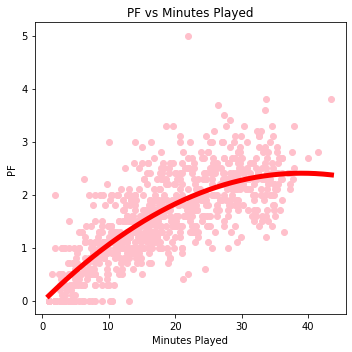

In [15]:
x_array = NBA_regular_2021[independent_variable]
y_array = NBA_regular_2021[dependent_variable]

# Fit a 2nd-degree polynomial
coeffs = np.polyfit(x_array, y_array, deg=2)

# Evaluate the polynomial
p = np.poly1d(coeffs)
x_fit = np.linspace(np.min(x_array), np.max(x_array), 500)
y_fit = p(x_fit)

#make a new plot
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.scatter(x_array, y_array, color='pink')
#axs.plot(x_fit_linear, y_fit_linear, color='green', linewidth=3, dashes=[3,1])
axs.plot(x_fit, y_fit, color='red', linewidth=5)

axs.set_title('%s vs Minutes Played' %dependent_variable)
axs.set_xlabel("Minutes Played")
axs.set_ylabel(dependent_variable)

plt.tight_layout()
plt.show()

<div style = 'background-color:lawngreen'> <br> <center>  <b> <u> <font size="5">  EXERCISES </font> </u> </b>    </div>
<div style = 'background-color:lawngreen'> <br> </div>

### 🔍 EXERCISE 1: Change the dependent variable to another stat you think might be interesting. Show the distribution of the stat, and the scatter between this stat and 3-Point Attempts. 3PA. Is there a potential relationship between 3-Point Attempts and this stat?

Hints and steps: 
- use code from the <span style="background-color: salmon;"> <b> <u> PLOTTING SCATTERS </u> </b> </span>  section to create a histogram for a new dependent variable. 
- use code from the same section to create a scatter of the dependent variable and the new independent variable (3PA)
- Does it look like the two variables are correlated?

### 🔍 EXERCISE 2: Find the Pearson correlation coefficient between the stat you chose and 3PA. Is there any kind of correlation between the two variables? If there is a correlation, is it weak or strong?

Hints and steps: 
- use code from the <span style="background-color: khaki;"> <b> <u> PEARSON COEFFICIENT </u> </b> </span>  section to calculate the Pearson correlation coefficient
- What does this value of the coefficient mean?

### 🔍 EXERCISE 3: Plot the linear fit for the relationship between free throw attempts (FTA) and number of two pointers made (2P). Set FTA as the independent variable and 2P as the dependent variable:

Hints and steps: 
- use code from the <span style="background-color: skyblue;"> <b> <u> LINEAR FIT </u> </b> </span>  section to plot the linear fit for this relationship

### 🔍 EXERCISE 4: Using the linear fit between FTA and 2P that you created above, calculate the expected number of 2-pointers for different values of free throw attempts:
#### a. within the range of the Free Throw Attempts data (interpolation)
#### b. outside of the range of the Free Throw Attempts data (extrapolation)

Hints and steps: 
- use the variables called `slope` and `y_intercept` to calculate the equation of a line
- the relationship should look something like
$\rm{Two Pointers} = \rm{slope} \times (\rm{Free Throw Attempts}) + \rm{y\_intercept}$
- for part a, use a value for FTA that is within the range of FTA (you can find the range by finding the minimum and the maximum of FTA)
- for part b, use a value of FTA that is above the highest FTA data

### 🔍 EXERCISE 5: For the polynomial fit below, change the degree of the polynomial from 0 to 5
#### a. What do you notice happens to the red line as you change the degree?
#### b.  What do you think is the best value to set for the degree for the curve of best fit?
#### c. What is a potential issue with fitting data with too many polynomials?

Hints and steps: 
- modify the `deg=` variable below in the calculation of `coeffs`
- what part of the equation below is changing as we change `deg=`?

## $ y = a_1 x + a_2x^2 + a_3x^3 + \cdots$

In [ ]:
independent_variable = "MP"
dependent_variable = "PTS"

# Fit a polynomial
coeffs = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], deg=)
# Evaluate the polynomial
polynomial = np.poly1d(coeffs)

#create a new array that is equally spaced for the independent variable
#start with the minimum, and end with the maximum value, and make 500 new data points that
#are equally spaced
independent_variable_fit = np.linspace(np.min(x_array), np.max(x_array), 500)

#make a new array for the prediction of the dependent variable
#using the polynomial fit and the equally spaced independent variable fit
dependent_variable_fit = polynomial(independent_variable_fit)

#make a new plot
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='lightgreen')
axs.plot(independent_variable_fit, dependent_variable_fit, color='red', linewidth=5)

axs.set_title('%s vs Minutes Played' %dependent_variable)
axs.set_xlabel("Minutes Played")
axs.set_ylabel(dependent_variable)

plt.tight_layout()
plt.show()

### 🔍 EXERCISE 6: Create two lines of best fit for the above data. One line should use a linear fit, and the other data should use a polynomial fit of your choosing.

Hints and steps: 
- Use the code above (where we fit and evaluate the polynomial) to create two separate polynomials.
- The polynomial for the linear fit should have `deg=1`
- The polynomial for the higher order fit should have `deg=` to a value that you think works well for the data

### 🔍 EXERCISE 7: Using the lines of best fit above, predict, on average:
#### a. How many points are scored by a player that plays just 1 minute (using the linear fit)?
#### b. How many points are scored by a player that plays just 1 minute (using the higher-order polynomial fit)?

#### c. How many points are scored by a player that plays 35 minutes (using the linear fit)?
#### d. How many points are scored by a player that plays 35 minutes (using the higher-order polynomial fit)?

#### e. How many points are scored by a player that plays just 60 minutes (using the linear fit)?
#### f. How many points are scored by a player that plays just 60 minutes (using the higher-order polynomial fit)?

#### g. Which do you expect to be the most accurate? Why?

Hints and steps: 
- Call the polynomials you created in the previous cell to predict the value of PTS given some value of MP. The calls will look something like

    `points_scored_1min_linear = PTS_from_MP_linear(1.0)`
    
    `points_scored_1min_poly = PTS_from_MP_poly(1.0)`

    where PTS_from_MP_linear is the linear fit function you created above and PTS_from_MP_poly is the higher-order polynomial fit function you created above

### 🔍 EXERCISE 8: Look for correlations in the dataset between an unexplored independent variable and all the other variables in the dataset. Show the scatter between this variable and all other variables. Choose one interesting relationship to further explore

Hints and steps: 
- Use the code from the <span style="background-color: mediumspringgreen;"> <b> <u> LOOKING FOR CORRELATIONS ON MANY PLOTS </u> </b> </span> where we look for correlations in our dataset
- Change the independent variable in this code (`independent_var=`) and run the code
- Pick one of the scatters from this collection of plots to further investigate in the next few exercises

### 🔍 EXERCISE 9: Looking at the relationship you've considered, find the Pearson correlation coefficient between the two variables. Are the two variables uncorrelated, weakly correlated, or strongly correlated?

Hints and steps: 
- use code from the <span style="background-color: khaki;"> <b> <u> PEARSON COEFFICIENT </u> </b> </span>  section to calculate the Pearson correlation coefficient
- What does this value of the coefficient mean?

### 🔍 EXERCISE 10: Find the linear regression and a polynomial fit. What can you predict would happen if the model is extrapolated to values outside of your range?

Hints and steps: 
- use code from exercises 6 and 7 above to create two new fits (one linear, one polynomial). 
- extrapolate your models to values outside of the range of the independent variable (to do this, pick a value for the independent variable that is outside the range of data and call your polynomial fits like in exercise 7)

## BONUS CONTENT

## Power law fitting

Let's have a look at a correlation that is not linear. For example, consider the relationship between Minutes Played and Points Scored. Recall, to fit a trend with a power law, we first take the logarithm of each dataset, and then fit the logarithms with a linear trend:

## $y=ax^c$
## $\log(y) = c\log(x) + \log(a)$

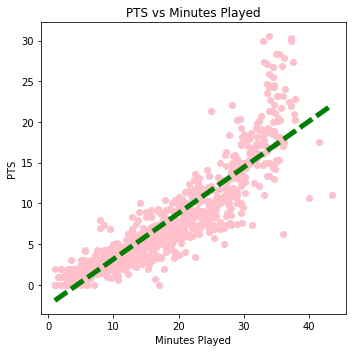

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "PTS"

# Calculate predicted values y = m* x + b
x_array = np.array(NBA_regular_2021[independent_variable]).reshape(-1, 1)
y_array = np.array(NBA_regular_2021[dependent_variable])
model = LinearRegression()
model.fit(x_array, y_array)
    
# Calculate predicted values
slope = model.coef_[0]
y_intercept = model.intercept_
#y_fit = model.predict(NBA_regular_2021[independent_variable])
x_fit_linear = np.linspace(np.min(x_array), np.max(x_array), 100)
y_fit_linear = slope * x_fit_linear + y_intercept

axs.scatter(x_array, y_array, color='pink')
axs.plot(x_fit_linear, y_fit_linear, color='green', linewidth=5, dashes=[3,1])

axs.set_title('%s vs Minutes Played' %dependent_variable)
axs.set_xlabel("Minutes Played")
axs.set_ylabel(dependent_variable)

plt.tight_layout()
plt.show()

For lower values of Minutes Played (around 10-15 minutes) the relationship could be linear, but for higher values (past around 25 minutes), it clearly is not. Let's look at this relationship in the logarithmic space

0.19935854368697165 1.2246354419160017


/home/pe7868/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


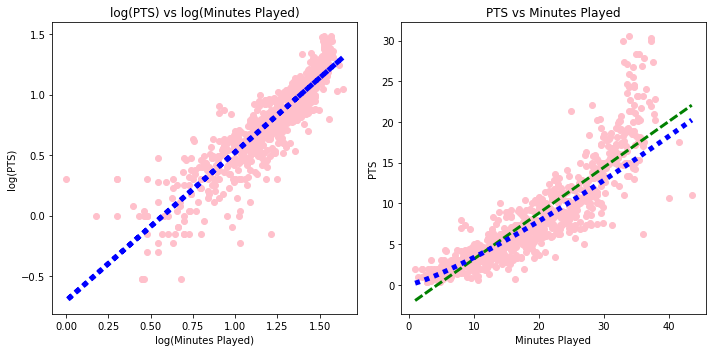

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "PTS"

# Fit a polynomial of degree 1 (linear)
#slope, y_intercept = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], 1)
    
# Calculate predicted values y = m* x + b
log_x_array_raw = np.array(np.log10(NBA_regular_2021[independent_variable]))
log_y_array_raw = np.array(np.log10(NBA_regular_2021[dependent_variable]))

log_x_array = log_x_array_raw[np.isfinite(log_y_array_raw)].reshape(-1, 1)
log_y_array = log_y_array_raw[np.isfinite(log_y_array_raw)]

x_array = 10.**log_x_array
y_array = 10.**log_y_array
#print(log_x_array)
model = LinearRegression()
model.fit(log_x_array, log_y_array)
    
# Calculate predicted values
log_slope = model.coef_[0]
log_y_intercept = model.intercept_

powerlaw_coefficient = (10.**log_y_intercept)
powerlaw_power = log_slope
print(powerlaw_coefficient, powerlaw_power)

#y_fit = model.predict(NBA_regular_2021[independent_variable])
log_y_fit = log_slope * log_x_array + log_y_intercept
x_fit_powerlaw = np.linspace(np.min(x_array), np.max(x_array), 100)
y_fit_powerlaw = powerlaw_coefficient * x_fit_powerlaw**powerlaw_power
    
axs[0].scatter(log_x_array, log_y_array, color='pink')
axs[0].plot(log_x_array, log_y_fit, color='blue', linewidth=5, dashes=[1,1])

axs[0].set_title('log(%s) vs log(Minutes Played)' %dependent_variable)
axs[0].set_xlabel("log(Minutes Played)")
axs[0].set_ylabel("log(%s)"%dependent_variable)

axs[1].scatter(x_array, y_array, color='pink')
axs[1].plot(x_fit_linear, y_fit_linear, color='green', linewidth=3, dashes=[3,1])
axs[1].plot(x_fit_powerlaw, y_fit_powerlaw, color='blue', linewidth=5, dashes=[1,1])


axs[0].set_title('log(%s) vs log(Minutes Played)' %dependent_variable)
axs[0].set_xlabel("log(Minutes Played)")
axs[0].set_ylabel("log(%s)"%dependent_variable)

axs[1].set_title('%s vs Minutes Played' %dependent_variable)
axs[1].set_xlabel("Minutes Played")
axs[1].set_ylabel("%s"%dependent_variable)

plt.tight_layout()
plt.show()